In [2]:
import os
import yaml
import random
from IPython.display import display, HTML, Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import moran_simulator as ms

mario_blue = "#6485fb"
mario_red = "#d20709"
mario_purple = "#9b4682"
mario_brown = "#974a02"
mario_gold = "#f7bc31"
mario_dark_green = "#148817"
mario_light_green = "#6df930"

AUTHOR: Maciej_Bak  
AFFILIATION: University_of_Basel  
AFFILIATION: Swiss_Institute_of_Bioinformatics  
CONTACT: wsciekly.maciek@gmail.com  
CREATED: 25-07-2020  
LICENSE: MIT

# <center>Moran Simulator: usecase tests</center>

## Section 1

Hyperlinks are parsed automatically: https://www.google.com  

Items might be listed:
 * 1
 * 2
  * 2a
  * 2b
  
Math mode of $\LaTeX$ is parsed properly: $\alpha = \frac{\beta}{\gamma \times \delta^\epsilon}$  

Text might be stressed in *italic* or **bold**.

In [3]:
size_list = [990, 10]
label_list = ["cooperate", "defect"]

BirthPayoffMatrix = np.array([[3, 0], [5, 1]])
DeathPayoffMatrix = np.array([[1, 1], [1, 1]])

mp = ms.MoranProcess(
    size_list=size_list,
    label_list=label_list,
    BirthPayoffMatrix=BirthPayoffMatrix,
    DeathPayoffMatrix=DeathPayoffMatrix,
)

In [4]:
random.seed(0)
simulation1 = mp.simulate(generations=25000)

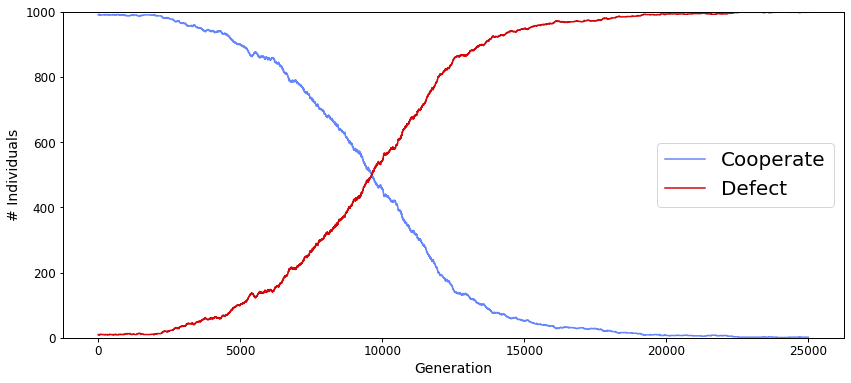

In [5]:
plt.figure(figsize=(14,6))
ax = plt.gca()
ax.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
simulation1['cooperate__size'].plot(color=mario_blue, linewidth=1.5, ax=ax, label="Cooperate")
simulation1['defect__size'].plot(color=mario_red, linewidth=1.5, ax=ax, label="Defect")
ax.set_ylim([0,1000])
plt.xlabel('Generation', size=14)
plt.ylabel('# Individuals', size=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc=7, fontsize=20)
plt.show()

## Section 2

chicken

In [6]:
size_list = [10, 990]
label_list = ["swerve", "straight"]

BirthPayoffMatrix = np.array([[0, -1], [1, -100]])
DeathPayoffMatrix = np.array([[1, 1], [1, 1]])

mp = ms.MoranProcess(
    size_list=size_list,
    label_list=label_list,
    BirthPayoffMatrix=BirthPayoffMatrix,
    DeathPayoffMatrix=DeathPayoffMatrix,
)

In [7]:
random.seed(0)
simulation2 = mp.simulate(generations=10000)

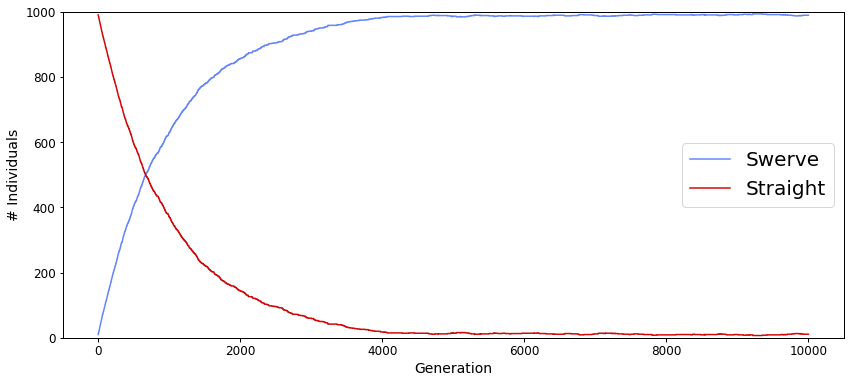

In [8]:
plt.figure(figsize=(14,6))
ax = plt.gca()
ax.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
simulation2['swerve__size'].plot(color=mario_blue, linewidth=1.5, ax=ax, label="Swerve")
simulation2['straight__size'].plot(color=mario_red, linewidth=1.5, ax=ax, label="Straight")
ax.set_ylim([0,1000])
plt.xlabel('Generation', size=14)
plt.ylabel('# Individuals', size=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc=7, fontsize=20)
plt.show()

## Section 3

rock paper scissors

In [9]:
size_list = [333, 333, 333]
label_list = ["rock", "paper", "scissors"]

BirthPayoffMatrix = np.array([[0, -10, 10], [10, 0, -10], [-10, 10, 0]])
DeathPayoffMatrix = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

mp = ms.MoranProcess(
    size_list=size_list,
    label_list=label_list,
    BirthPayoffMatrix=BirthPayoffMatrix,
    DeathPayoffMatrix=DeathPayoffMatrix,
)

In [10]:
random.seed(1)
simulation3 = mp.simulate(generations=5000)

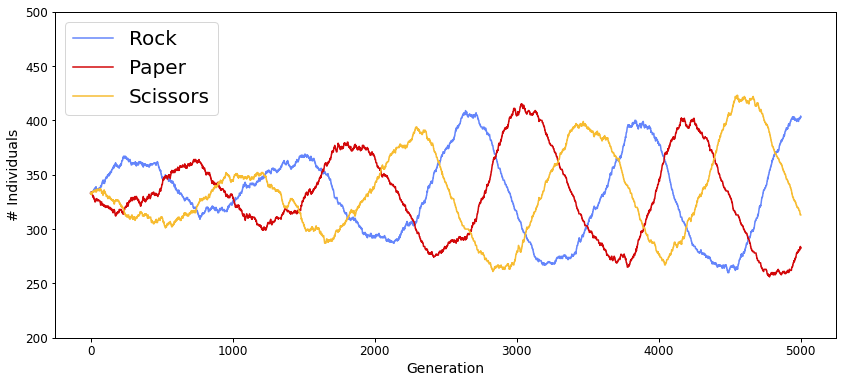

In [11]:
plt.figure(figsize=(14,6))
ax = plt.gca()
ax.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
simulation3['rock__size'].plot(color=mario_blue, linewidth=1.5, ax=ax, label="Rock")
simulation3['paper__size'].plot(color=mario_red, linewidth=1.5, ax=ax, label="Paper")
simulation3['scissors__size'].plot(color=mario_gold, linewidth=1.5, ax=ax, label="Scissors")
ax.set_ylim([200,500])
plt.xlabel('Generation', size=14)
plt.ylabel('# Individuals', size=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc=2, fontsize=20)
plt.show()

## Section 4

stag hunt

In [12]:
size_list = [700, 300]
label_list = ["stag", "hare"]

BirthPayoffMatrix = np.array([[4, 1], [3, 2]])
DeathPayoffMatrix = np.array([[1, 1], [1, 1]])

mp = ms.MoranProcess(
    size_list=size_list,
    label_list=label_list,
    BirthPayoffMatrix=BirthPayoffMatrix,
    DeathPayoffMatrix=DeathPayoffMatrix,
)

In [13]:
random.seed(0)
simulation4 = mp.simulate(generations=10000)

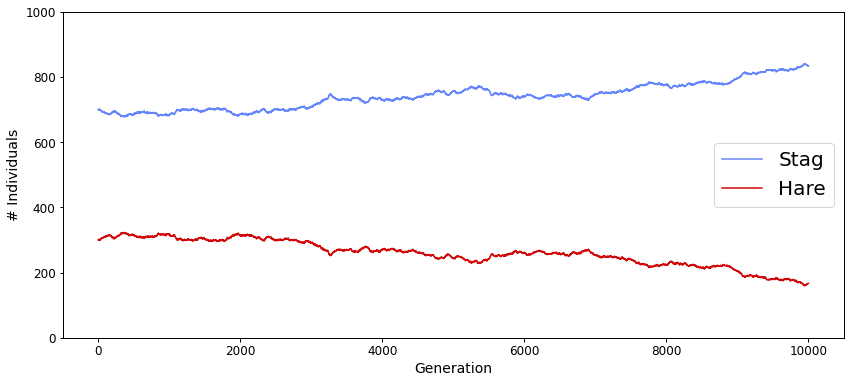

In [14]:
plt.figure(figsize=(14,6))
ax = plt.gca()
ax.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
simulation4['stag__size'].plot(color=mario_blue, linewidth=1.5, ax=ax, label="Stag")
simulation4['hare__size'].plot(color=mario_red, linewidth=1.5, ax=ax, label="Hare")
ax.set_ylim([0,1000])
plt.xlabel('Generation', size=14)
plt.ylabel('# Individuals', size=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc=7, fontsize=20)
plt.show()

## Publication Figure

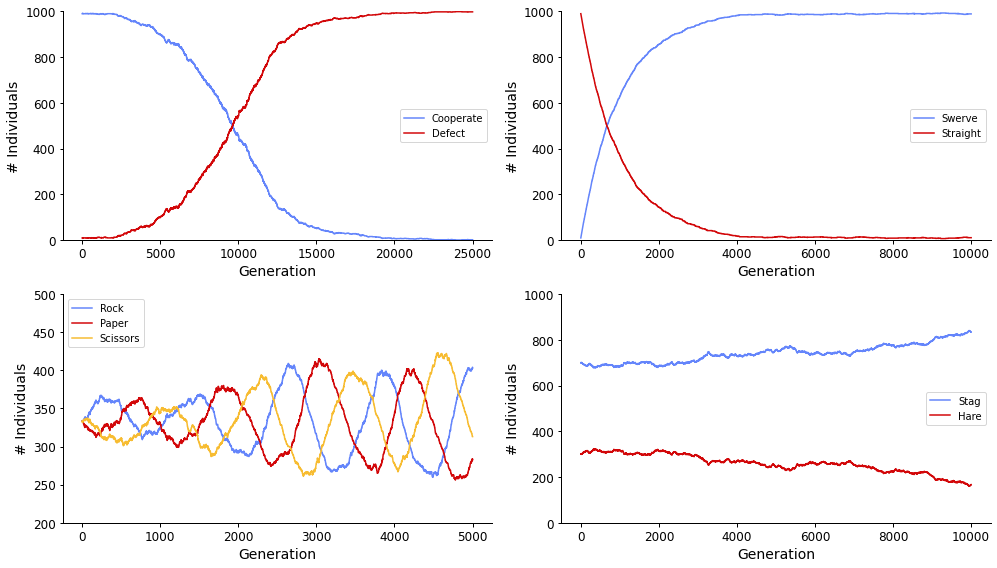

In [20]:
fig, ax =  plt.subplots(2, 2, figsize=(14,8))

plt.subplot(2, 2, 1)
ax1 = plt.gca()
ax1.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(1)
simulation1['cooperate__size'].plot(color=mario_blue, linewidth=1.5, ax=ax1, label="Cooperate")
simulation1['defect__size'].plot(color=mario_red, linewidth=1.5, ax=ax1, label="Defect")
ax1.set_ylim([0,1000])
plt.xlabel('Generation', size=14)
plt.ylabel('# Individuals', size=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(loc=7, fontsize=10)

plt.subplot(2, 2, 2)
ax2 = plt.gca()
ax2.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(1)
simulation2['swerve__size'].plot(color=mario_blue, linewidth=1.5, ax=ax2, label="Swerve")
simulation2['straight__size'].plot(color=mario_red, linewidth=1.5, ax=ax2, label="Straight")
ax2.set_ylim([0,1000])
plt.xlabel('Generation', size=14)
plt.ylabel('# Individuals', size=14)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.legend(loc=7, fontsize=10)

plt.subplot(2, 2, 3)
ax3 = plt.gca()
ax3.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(1)
simulation3['rock__size'].plot(color=mario_blue, linewidth=1.5, ax=ax3, label="Rock")
simulation3['paper__size'].plot(color=mario_red, linewidth=1.5, ax=ax3, label="Paper")
simulation3['scissors__size'].plot(color=mario_gold, linewidth=1.5, ax=ax3, label="Scissors")
ax3.set_ylim([200,500])
plt.xlabel('Generation', size=14)
plt.ylabel('# Individuals', size=14)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.legend(loc=2, fontsize=10)


plt.subplot(2, 2, 4)
ax4 = plt.gca()
ax4.tick_params(width=1)
for axis in ['top','bottom','left','right']:
    ax4.spines[axis].set_linewidth(1)
simulation4['stag__size'].plot(color=mario_blue, linewidth=1.5, ax=ax4, label="Stag")
simulation4['hare__size'].plot(color=mario_red, linewidth=1.5, ax=ax4, label="Hare")
ax4.set_ylim([0,1000])
plt.xlabel('Generation', size=14)
plt.ylabel('# Individuals', size=14)
ax4.tick_params(axis='both', which='major', labelsize=12)
ax4.legend(loc=7, fontsize=10)

sns.despine(ax=ax1)
sns.despine(ax=ax2)
sns.despine(ax=ax3)
sns.despine(ax=ax4)

plt.tight_layout()
plt.savefig(os.path.join("..", "images", "figure.png"), dpi=600)
plt.show()

---